### 多项式回归

$y=ax^{2}+bx+c$

像这种多项式的目标函数，我们可以把$x^{2}$整体看成第二个纬度，然后再用线性回归方法求解

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)

In [3]:
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1,size=100)

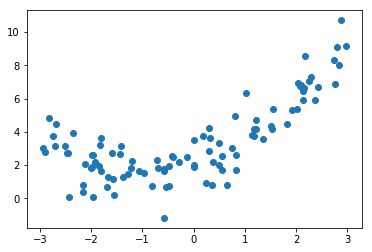

In [4]:
plt.scatter(x,y)
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
y_predict = lin_reg.predict(X)

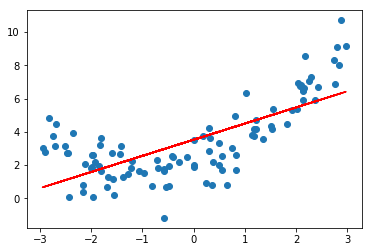

In [7]:
plt.scatter(x,y)
plt.plot(x,y_predict,color='r')
plt.show()

In [8]:
X2 = np.hstack([X,(X**2)])

In [9]:
X2.shape

(100, 2)

In [10]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
y_predict2 = lin_reg2.predict(X2)

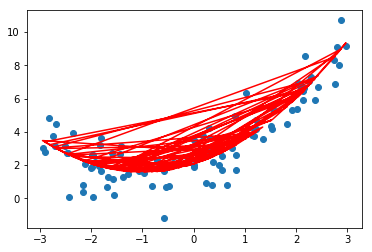

In [12]:
plt.scatter(x,y)
plt.plot(x,y_predict2,color='r')
plt.show()

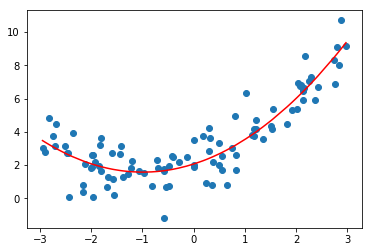

In [13]:
#### plt.plots() 是描点画图，所以要画曲线先排序
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict2[np.argsort(x)],color='r')
plt.show()

In [14]:
lin_reg2.coef_

array([0.98398097, 0.49580281])

### scikit-learn中的多项式回归和Pipeline

In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [17]:
X2.shape

(100, 3)

In [18]:
X2[:5]

array([[ 1.00000000e+00, -5.86084542e-01,  3.43495090e-01],
       [ 1.00000000e+00,  9.66933674e-03,  9.34960729e-05],
       [ 1.00000000e+00, -1.85028692e+00,  3.42356168e+00],
       [ 1.00000000e+00, -5.83330076e-01,  3.40273977e-01],
       [ 1.00000000e+00,  1.21714580e+00,  1.48144391e+00]])

In [19]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2,y)
y_predict2 = lin_reg2.predict(X2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

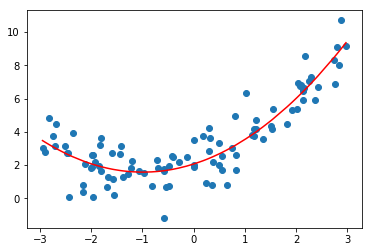

In [20]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict2[np.argsort(x)],color='r')
plt.show()

### 关于PolynomialFeatures

In [21]:
X = np.arange(1,11).reshape(-1,2)

In [23]:
X.shape
X

(5, 2)

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [24]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [26]:
X2.shape

(5, 6)

In [27]:
X2
### 噪声列 、x1、 x2、x1^2、x1*x2、x2^2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

### Pipeline

In [28]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1,100)

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

ploy_reg = Pipeline([
    ("poly",PolynomialFeatures(degree=2)),
    ("std_scaler",StandardScaler()),
    ("lin_reg",LinearRegression())
])

In [30]:
ploy_reg.fit(X,y)
y_predict = ploy_reg.predict(X)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

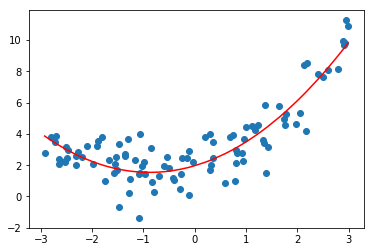

In [31]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)],color='r')
plt.show()